# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from datetime import datetime as dt
import plotly.express as px

### Dataset link [https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

# **Loading Dataset**

In [2]:
# Read the CSV file into a DataFrame
pd.set_option('display.max_columns', None)
url_data = ('https://raw.githubusercontent.com/amanKIIT/Customer-Segmentation/main/marketing_campaign.csv')
df = pd.read_csv(url_data,sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.shape

(2240, 29)

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#**Data Preparation**


1.   Handling missing values
2.   Drop unnecessary features

In [6]:
#checking for any missing values
missing_values = df.isnull().sum()
missing_values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
#dropping records with no income
df = df.dropna()
df.shape

(2216, 29)

In [8]:
#dropping unnecessary features
drop_features = ['Z_CostContact','Z_Revenue','Complain']
df = df.drop(drop_features, axis=1)
df.shape

(2216, 26)

#**Feature Engineering**

1.   Calculating age of customers from dob






In [9]:
df['Age'] = 2015 - df.Year_Birth

2.   Calculating Total Spendings

In [10]:
df['TotalSpending'] =  df.MntWines + df.MntFruits + df.MntMeatProducts + df.MntFishProducts + df.MntSweetProducts + df.MntGoldProds

3.   Calculating total number of children

In [11]:
df['Children'] = df['Kidhome'] + df['Teenhome']



4.   Dividing on the basis of age groups



In [12]:
df.loc[(df['Age'] >= 13) & (df['Age'] < 18), 'AgeGroup'] = 'Teen'
df.loc[(df['Age'] >= 18) & (df['Age'] < 60), 'AgeGroup'] = 'Adult'
df.loc[(df['Age'] >= 60), 'AgeGroup'] = 'Senior Citizen'



4.   Grouping on the basis of marital status (single/relation)

In [13]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [14]:
df.Marital_Status = df.Marital_Status.replace({'Together': 'Relation',
                                                           'Married': 'Relation',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single',
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

# **Finding and removing outliers**

#### Outliers by age

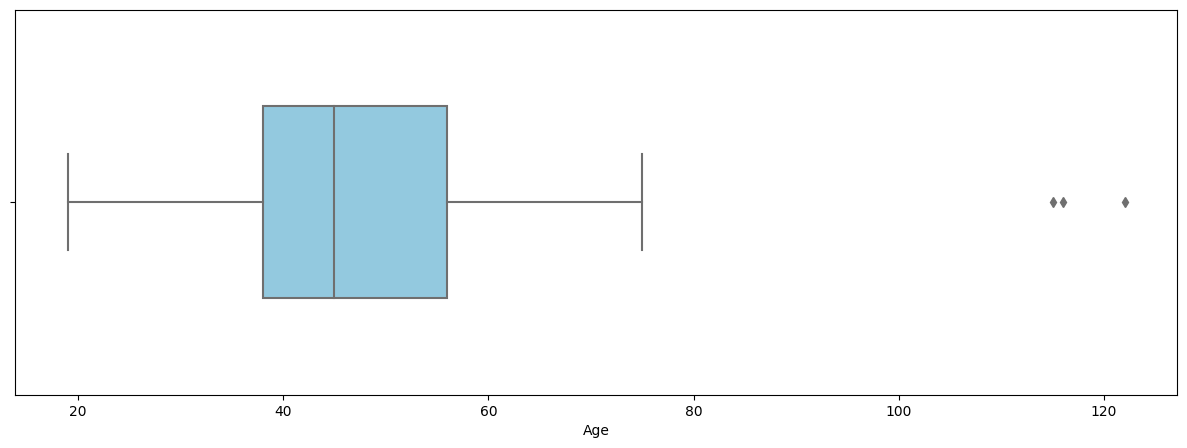

In [15]:
#finding outliers by age of customers
plt.figure(figsize=(15,5))
sns.boxplot(x=df.Age, color='skyblue', width=0.5);

#### Outliers by income

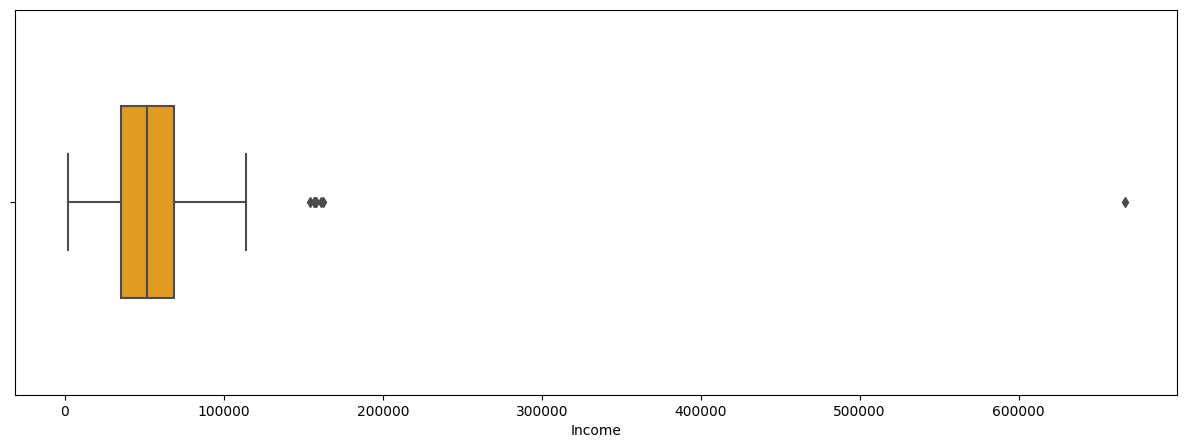

In [16]:
#finding outliers by income of customers
plt.figure(figsize=(15,5))
sns.boxplot(x=df.Income, color='orange', width=0.5);

#### Outliers by Total Spending

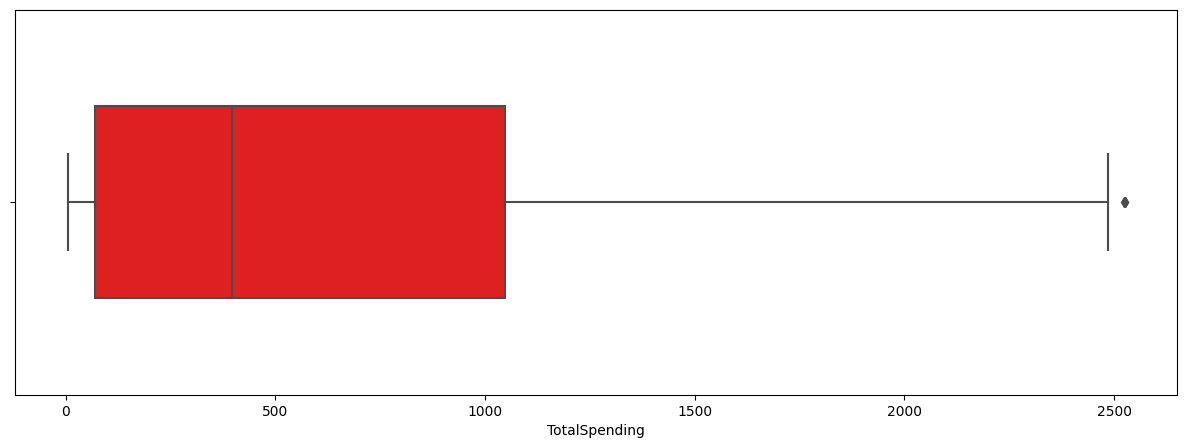

In [17]:
#finding outliers by Total Speding of customers
plt.figure(figsize=(15,5))
sns.boxplot(x=df.TotalSpending, color='red', width=0.5);

### Removing outliers
*   Dropping customers above 100 years of age

*   Dropping customers with income more than 120000

*   Total Spending more than 2500






In [18]:
df = df[df.Age < 100]
df = df[df.Income < 120000]
df = df[df.TotalSpending < 2500]
df.shape

(2202, 30)

In [19]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,TotalSpending,Children,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,58,1617,0,Adult
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,61,27,2,Senior Citizen
2,4141,1965,Graduation,Relation,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,50,776,0,Adult
3,6182,1984,Graduation,Relation,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,31,53,1,Adult
4,5324,1981,PhD,Relation,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,34,422,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Relation,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,48,1341,1,Adult
2236,4001,1946,PhD,Relation,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,69,444,3,Senior Citizen
2237,7270,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,34,1241,0,Adult
2238,8235,1956,Master,Relation,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,59,843,1,Adult


# **Exploratory Data Analysis (EDA)**

### Marital Status

In [20]:
maritalstatus = df.Marital_Status.value_counts()

fig = px.pie(maritalstatus,
             values = maritalstatus.values,
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

### Average Spending according to Marital Status

Text(0, 0.5, 'Marital Status')

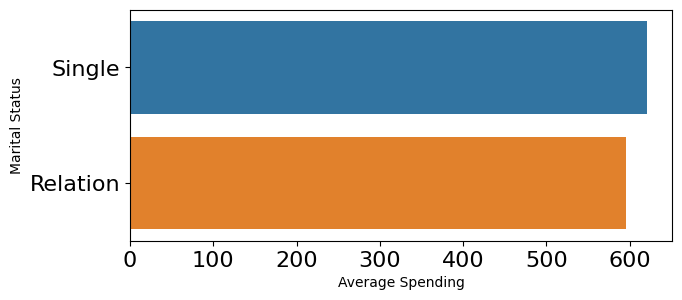

In [21]:
maritalspending = df.groupby('Marital_Status')['TotalSpending'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(7,3))
sns.barplot(data = maritalspending_df, x="Average Spending", y="Marital Status");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending')
plt.ylabel('Marital Status')

**Insights:**

The customer population which belongs to the single category on an average basis spends more.

### Education Level

In [22]:
education = df.Education.value_counts()

fig = px.bar(x=education.index, y=education.values)

fig.update_traces(
    hovertemplate='Education Level: %{x}<br>Count: %{y}',)

fig.update_layout(
    xaxis_title="Education Level",
    yaxis_title="Count",
    title="Count of Customers based upon their Education Level",
    showlegend=False,
    font=dict(size=14)
)

fig.show()

In [23]:
import plotly.graph_objects as go
import plotly.colors as pc
education_avg_spendings = df.groupby('Education')['TotalSpending'].mean()

# Define a color scale
color_scale = pc.qualitative.Pastel

fig = go.Figure()

for i, (edu, spending) in enumerate(zip(education_avg_spendings.index, education_avg_spendings.values)):
    fig.add_trace(go.Bar(
        x=[edu],
        y=[spending],
        marker=dict(color=color_scale[i]),
        name=edu,
        hovertemplate="Education Level: %{x}<br>Avg Spending: %{y:.2f}"
    ))

fig.update_layout(
    xaxis_title="Education Level",
    yaxis_title="Average Spendings",
    title="Average Spending based upon Education Level",
    font=dict(size=14),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

fig.show()


**Insights:**

 Although there is a significant difference between the number of graduates and postgraduates(PhD and Masters), still their average spendings are comparable which means that the postgraduates tend to spend more.

### Total Spending based upon number of children in the family

In [24]:
import plotly.express as px
children = df.Children.value_counts()

fig = px.pie(children,
             values = children.values,
             names = children.index,
             color_discrete_sequence=px.colors.qualitative.D3)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.update_traces(hole=0.3)
fig.update_traces(hovertemplate='<b>No.of children: %{label}</b><br>Count: %{value}<br>Percentage: %{percent:.1%}')
fig.update_layout(title='Number of children(Teens + Kids) at home among the customer population',showlegend=True,
    legend=dict(x=0.8, y=0.5))
fig.show()

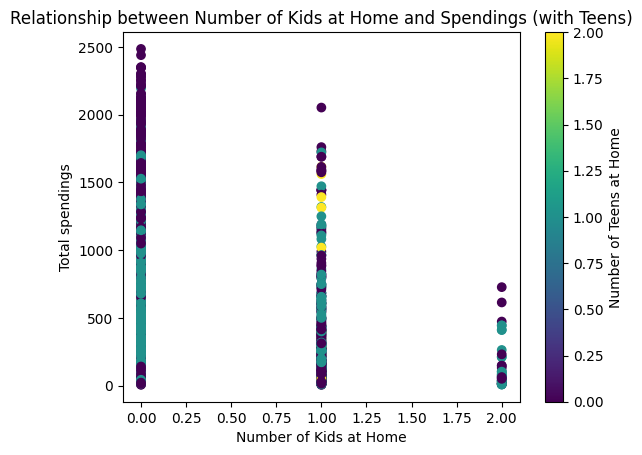

In [25]:
# Scatter plot with color encoding of Teenhome
plt.scatter(df['Kidhome'], df['TotalSpending'], c=df['Teenhome'])
plt.xlabel('Number of Kids at Home')
plt.ylabel('Total spendings')
plt.title('Relationship between Number of Kids at Home and Spendings (with Teens)')
plt.colorbar(label='Number of Teens at Home')
plt.show()

**Insights:**

The customers who do not have any children or the ones who are having more number of teenagers at their homes are likely to have higher spendings.

### Age Distribution of Customers

Text(0, 0.5, 'Counts')

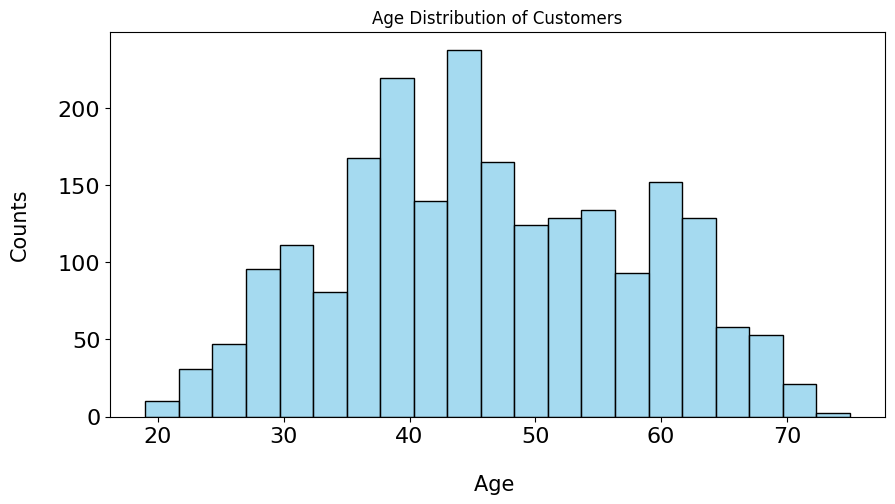

In [26]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data = df.Age, color='skyblue')
ax.set(title = "Age Distribution of Customers")
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age ', fontsize=15, labelpad=20)
plt.ylabel('Counts', fontsize=15, labelpad=20)

**Insights:**

Age of the customer tends to form a nearly normal distribution with majority of the customers lying in the age group of 40-50 years.

### Income Distribution of Customers

Text(0, 0.5, 'Counts')

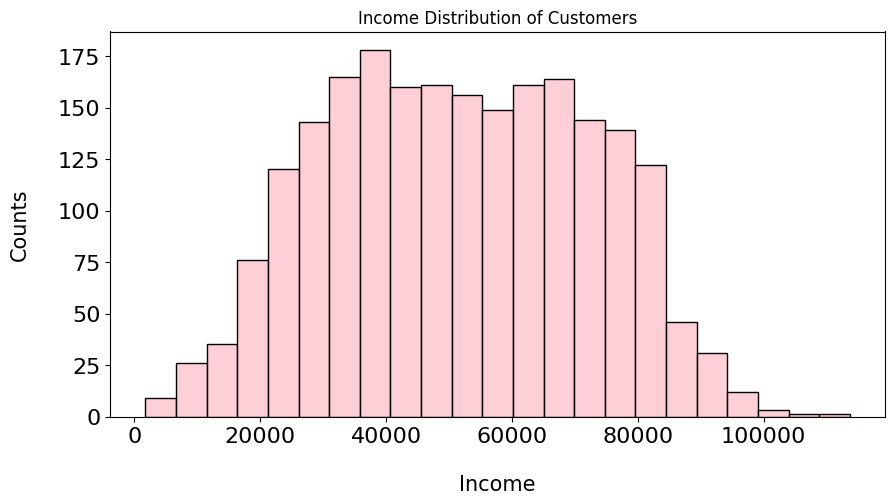

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data = df.Income, color = "pink")
ax.set(title = "Income Distribution of Customers")

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=15, labelpad=20)
plt.ylabel('Counts', fontsize=15, labelpad=20)


**Insights:**

The income of the customers has a normal distribution with most of the customers earning between 30000 and 80000.

### Relationship: Age vs Spendings

Text(0.5, 1.0, 'Spendings by Age')

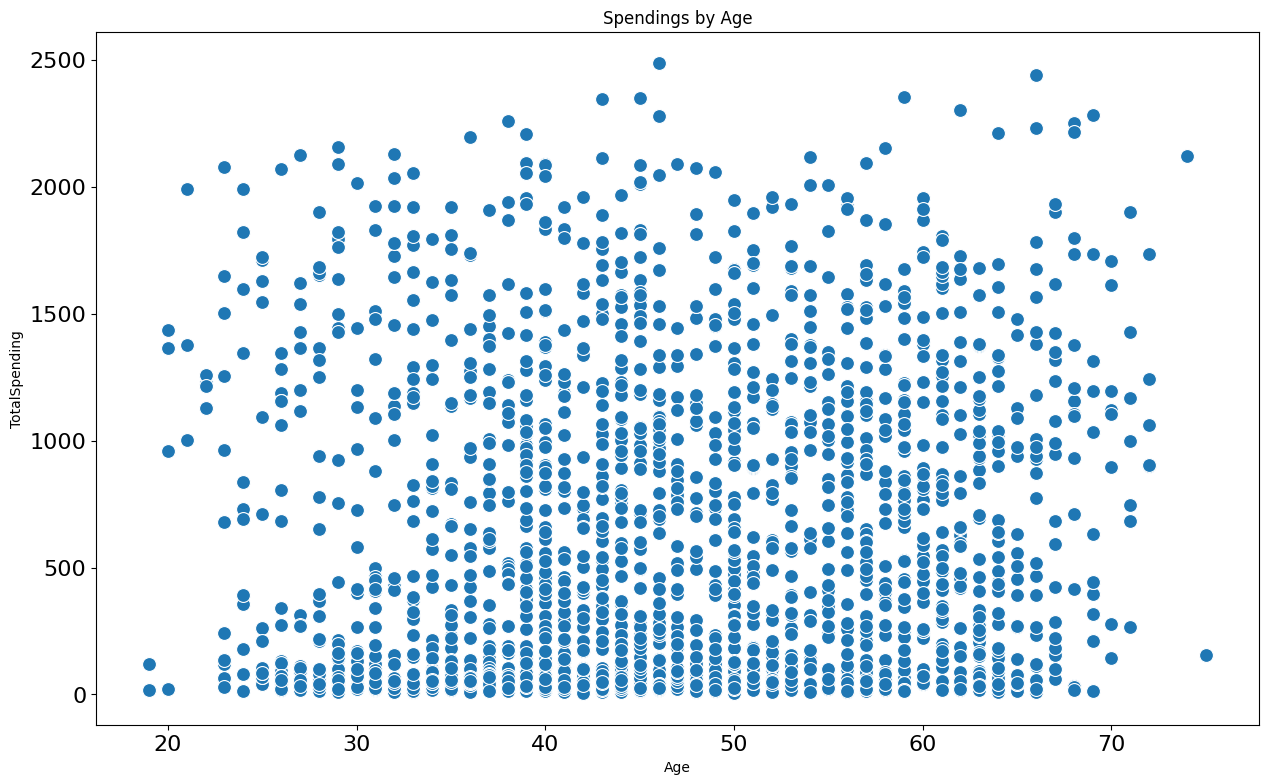

In [28]:
plt.figure(figsize=(15,9))
sns.scatterplot(x=df.Age, y=df.TotalSpending, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age')
plt.ylabel('TotalSpending');
plt.title("Spendings by Age")

### Relationship: Income vs Spendings

Text(0.5, 1.0, 'Income vs. Spendings')

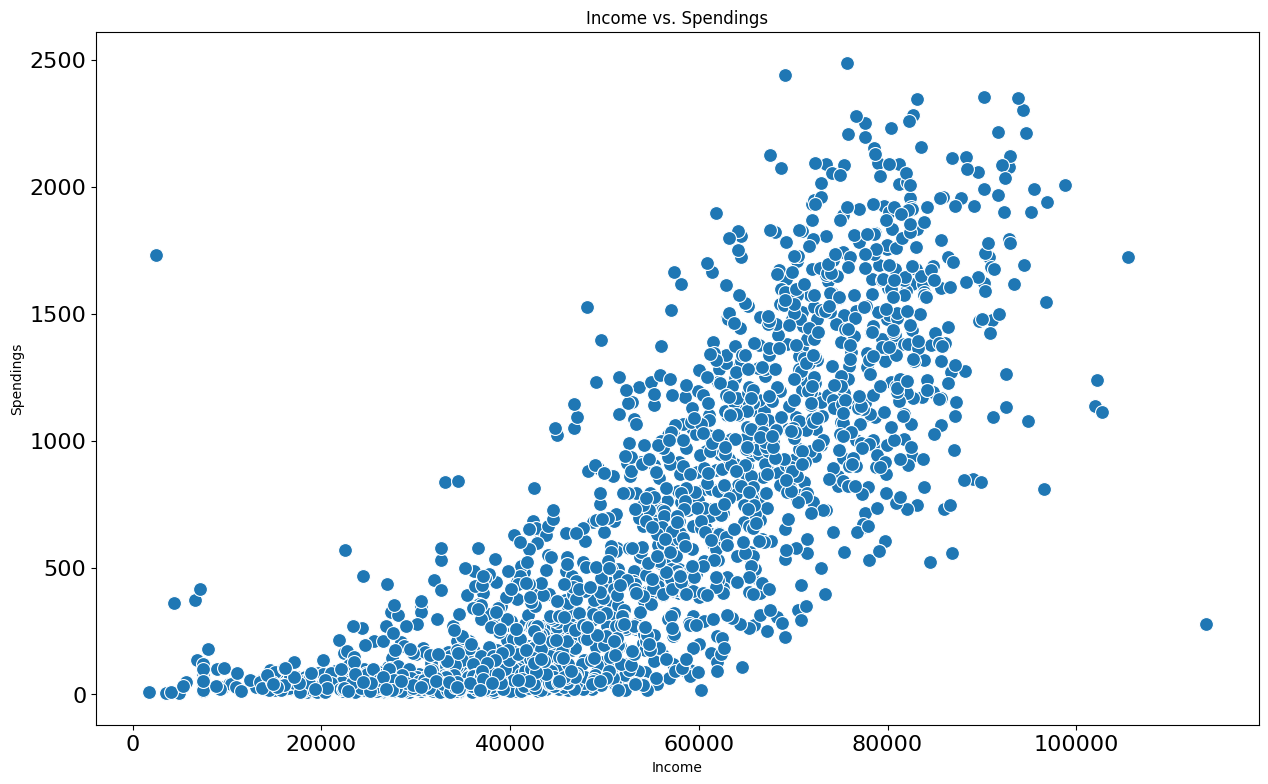

In [29]:
plt.figure(figsize=(15,9))

sns.scatterplot(x=df.Income, y=df.TotalSpending, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income')
plt.ylabel('Spendings');
plt.title('Income vs. Spendings')

**Insights:**

A linear relationship is observed between the spendings and income of customers.
If income is higher then a customer tends to spend more, which means income is directly proportional to spendings.

In [30]:

avg_visits = df.groupby('Age')['NumWebVisitsMonth'].mean().reset_index()

fig = px.scatter(avg_visits, x='Age', y='NumWebVisitsMonth',
                 title='Average number of website visits per month for different ages of customers.',
                 labels={'Age': 'Age', 'NumWebVisitsMonth': 'Avg visits per month'})

fig.update_traces(marker=dict(color='red', symbol='circle', size=10),mode='lines+markers')

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Avg. number of website visits',
    font=dict(size=14)
)

fig.show()

**Insights:**
* There is almost a constant(very slightly varying) trend between the average
number of website visits in a month among the customers which lie in the age group of (30-50) years which is about 5-6 times a month.

* A sharp fluctuation is there in the average number of website visits per month as soon as the age group makes a transition to customers who are 65+ years of age.

In [31]:
agegroup = df['AgeGroup'].value_counts()

fig = px.pie(labels=agegroup.index, values=agegroup.values, names=agegroup.index, width=550, height=550)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hole=0.6,
    marker=dict(
        colors=np.array(['lightpink', 'deeppink', 'lightpink', 'deeppink']),
        line=dict(color='white', width=2)
    )
)

fig.update_layout(
    annotations=[
        dict(
            text='Age Group',
            x=0.5,
            y=0.5,
            font_size=36,
            showarrow=False,
            font_color='black'
        )
    ],
    showlegend=False
)

fig.show()

In [32]:
import plotly.graph_objects as go

age_groups = ['Teen', 'Adult', 'Senior Citizen']  # Age groups in the desired order

# Group by 'age_group' and calculate the total count of in-store purchases for each group
age_group_in_store_purchases = df.groupby('AgeGroup')['NumStorePurchases'].sum().reindex(age_groups)

# Group by 'age_group' and calculate the total count of web purchases for each group
age_group_web_purchases = df.groupby('AgeGroup')['NumWebPurchases'].sum().reindex(age_groups)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=age_group_in_store_purchases.index,
    y=age_group_in_store_purchases.values,
    name="In-Store Purchases",
    marker=dict(color='purple'),
))

fig.add_trace(go.Bar(
    x=age_group_web_purchases.index,
    y=age_group_web_purchases.values,
    name="Web Purchases",
    marker=dict(color='deeppink'),
))

fig.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Total Count of Purchases",
    title="Total Count of In-Store and Web Purchases by Age Group",
    font=dict(size=14),
    barmode='group'  # Display bars in groups
)

fig.show()


**Insights:**

Mostly adults (between the ages of 19-58 years) are active in shopping at both the online and offline channels.

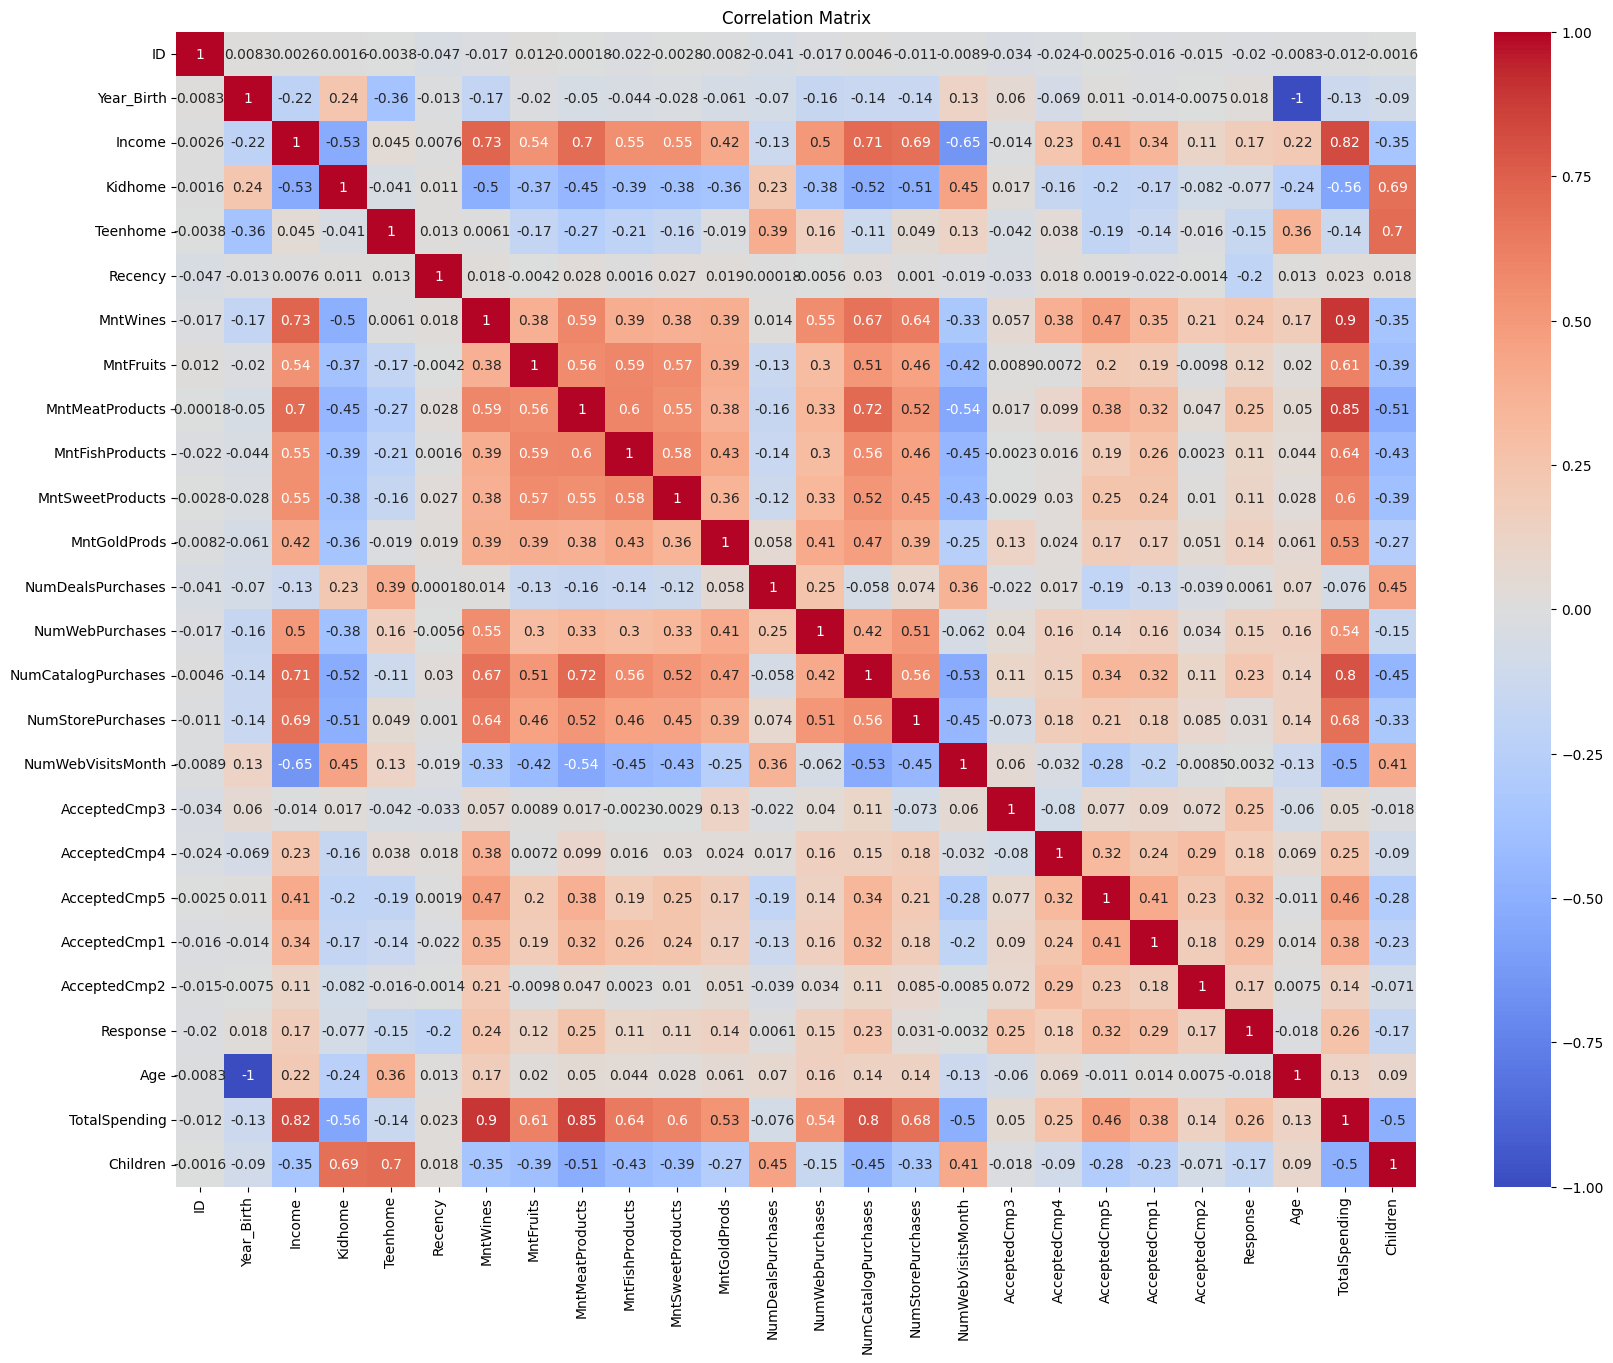

In [33]:
correlation_matrix = df.corr(numeric_only=True)  # Calculate the correlation matrix

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### **Now if we set a threshold value so that we can see which attributes have a strong correlation between them.**

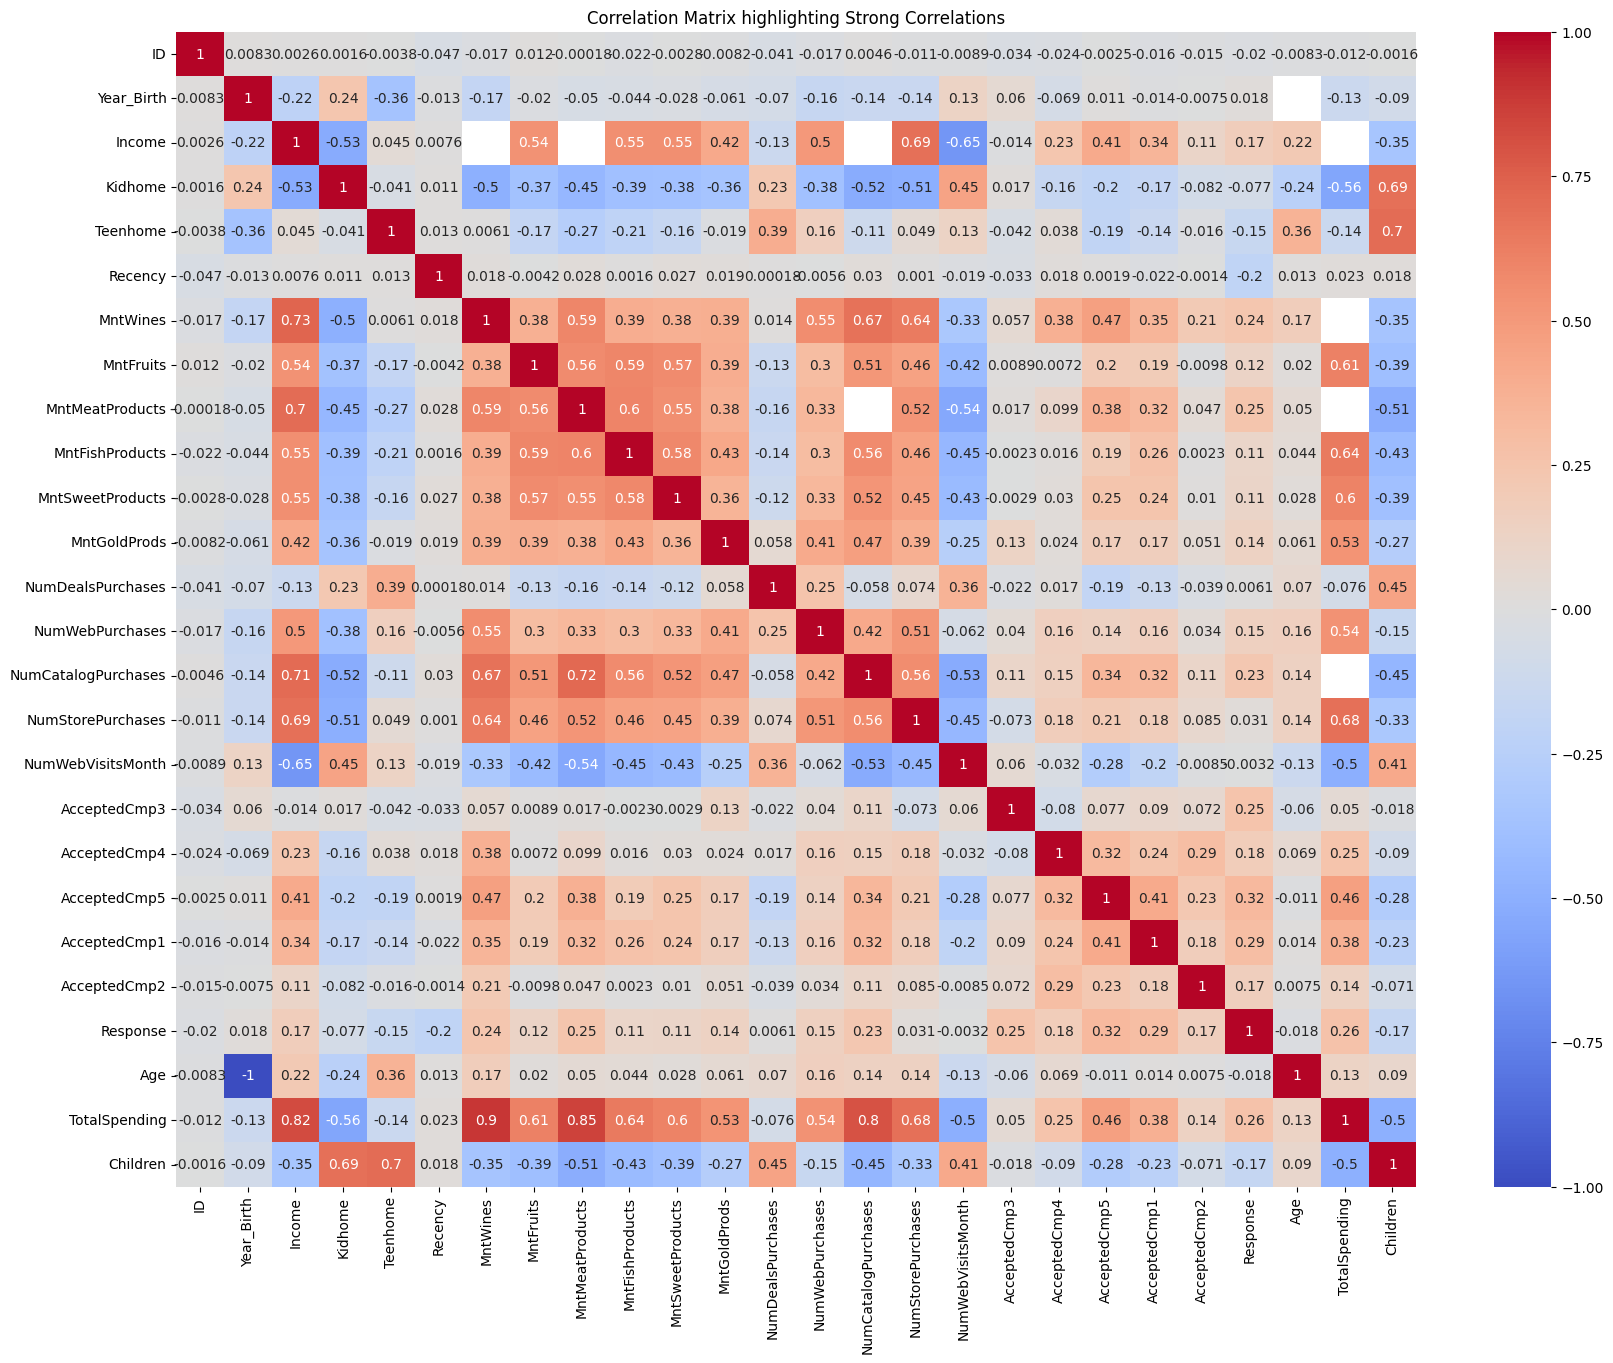

In [34]:
correlation_matrix = df.corr(numeric_only=True)

# Set the threshold for strong correlation
threshold = 0.7

# Create a mask to identify strong correlations
mask = np.abs(correlation_matrix) >= threshold

# Set the diagonal and lower triangular part of the mask to False to exclude self-correlations and duplicates
mask = np.triu(mask, k=1)

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix highlighting Strong Correlations')
plt.show()


**Insights:**

There is a strong correlation which is > threshold value set by us between the following pairs of attributes:

1.   Income and TotalSpending
2.   Income and NumCatalogPurchases
3.   NumCatalogPurchases and TotalSpending
4.   Income and MntMeatProducts
5.   TotalSpending and MntMeatProducts
6.   Income and MntWines
7.   TotalSpending and MntWines




# **Clustering**

In [35]:
#Using only relevant features for clustering
new_df = df.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer','Education',	'Marital_Status',
                          'Recency', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'AgeGroup'], axis=1)
new_df

,Income,NumDealsPurchases,NumWebVisitsMonth,Age,TotalSpending,Children
0,58138.0,3,7,58,1617,0
1,46344.0,2,5,61,27,2
2,71613.0,1,4,50,776,0
3,26646.0,2,6,31,53,1
4,58293.0,5,5,34,422,1
...,...,...,...,...,...,...
2235,61223.0,2,5,48,1341,1
2236,64014.0,7,7,69,444,3
2237,56981.0,1,6,34,1241,0
2238,69245.0,2,3,59,843,1


C:\Users\amanr\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\amanr\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\amanr\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\amanr\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\amanr\AppData\Roaming\Python\Py

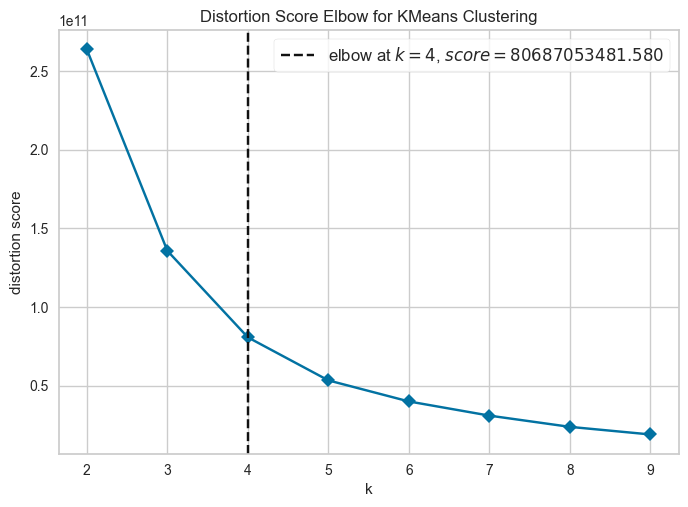

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=(2,10),timings=False, locate_elbow=True)
Elbow_M.fit(new_df)
Elbow_M.show()

In [37]:
# Initiating the K-means clustering model
model = KMeans(n_clusters=4,random_state=42)

# Fit model and predict clusters
cluster_df = model.fit_predict(new_df)

# Assigning clusters to the original dataframe
df["Clusters"] = cluster_df


C:\Users\amanr\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# Evaluating the model

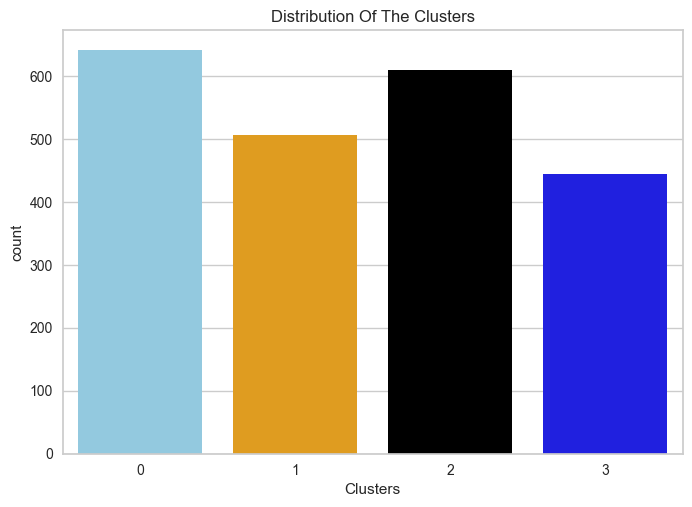

In [38]:
#Plotting countplot of clusters
pal = ["skyblue","orange","black","blue"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [39]:
import plotly.express as px

col = ["skyblue","black","orange","blue"]
cluster_counts = df.Clusters.value_counts()

fig = px.pie(cluster_counts,
             values=cluster_counts.values,
             names=cluster_counts.index)

fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker=dict(line=dict(color='white', width=2)),
                  marker_colors=col)

fig.show()


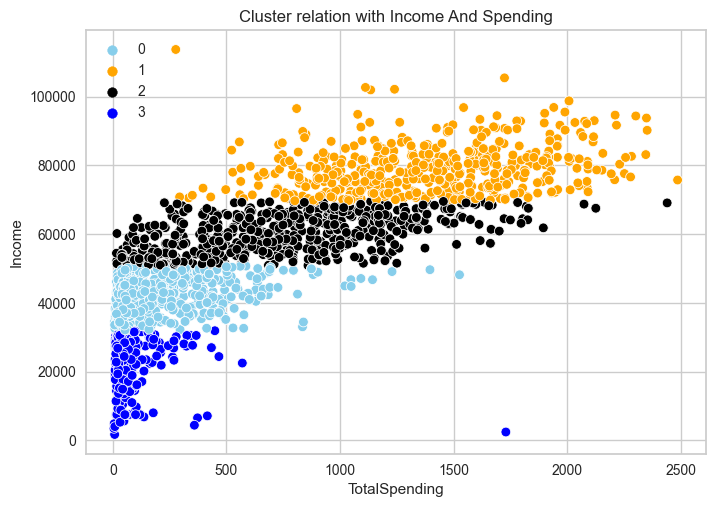

In [40]:
pl = sns.scatterplot(data = df,x=df["TotalSpending"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster relation with Income And Spending")
plt.legend()
plt.show()


# Evaluating the model

### Evaluating using silhoutte score

In [41]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
features = new_df[['Income','NumDealsPurchases',	'NumWebVisitsMonth',	'Age',	'TotalSpending',	'Children']]
# Calculate the silhouette coefficient
silhouette_avg = silhouette_score(features, cluster_df)
silhouette_avg


0.5366517353122632

In [42]:
calinski_harabasz_avg = calinski_harabasz_score(features, cluster_df)
calinski_harabasz_avg

7821.213581459035

In [43]:
davies_bouldin_avg = davies_bouldin_score(features, cluster_df)
davies_bouldin_avg

0.5483847999068845

<Figure size 800x550 with 0 Axes>

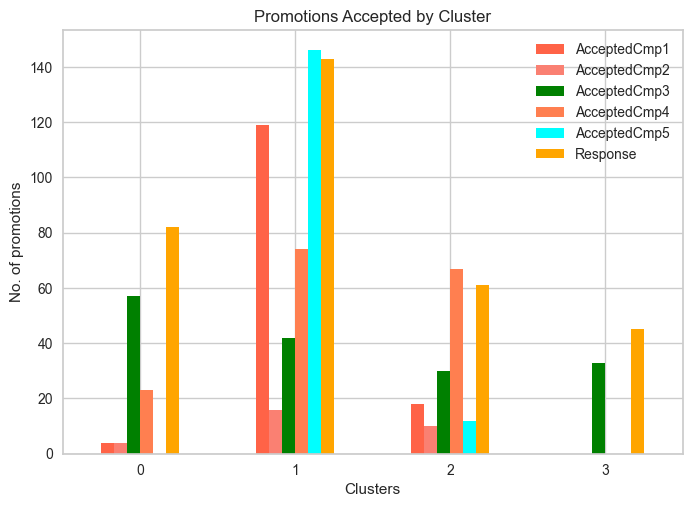

In [44]:
cluster_campaign = df.groupby('Clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                                                  'AcceptedCmp5', 'Response']].sum()

plt.figure()
cluster_campaign.plot(kind='bar', color=['tomato', 'salmon', 'green', 'coral', 'cyan', 'orange'])

plt.title('Promotions Accepted by Cluster')
plt.xlabel('Clusters')
plt.ylabel('No. of promotions');
plt.xticks(rotation=0, ha='center');

<Figure size 800x550 with 0 Axes>

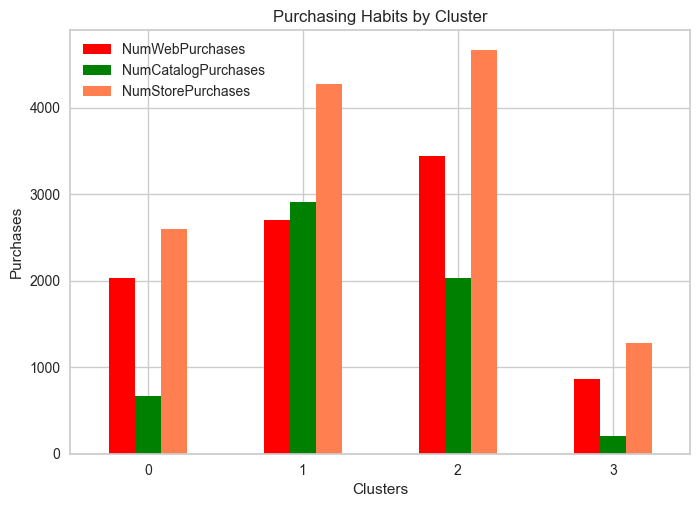

In [45]:
cluster_purchases = df.groupby('Clusters')[['NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases']].sum()

plt.figure()
cluster_purchases.plot(kind='bar', color=['red', 'green', 'coral', 'cyan'])

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters')
plt.ylabel('Purchases');
plt.xticks(rotation=0, ha='center');

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

<Figure size 3000x1500 with 0 Axes>

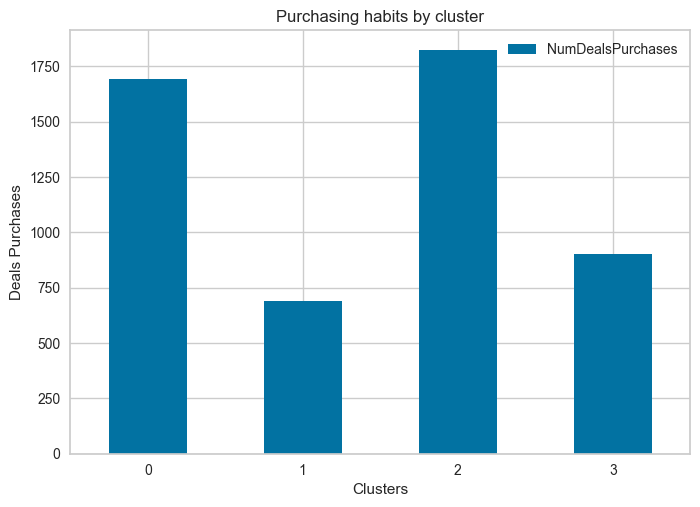

In [46]:
cluster_deals = df.groupby('Clusters')[['NumDealsPurchases']].sum()

plt.figure(figsize=(30,15))
cluster_deals.plot(kind='bar', stacked=False)

plt.title('Purchasing habits by cluster')
plt.xlabel('Clusters')
plt.ylabel('Deals Purchases');
plt.xticks(rotation=0, ha='center')

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

<Figure size 3000x1500 with 0 Axes>

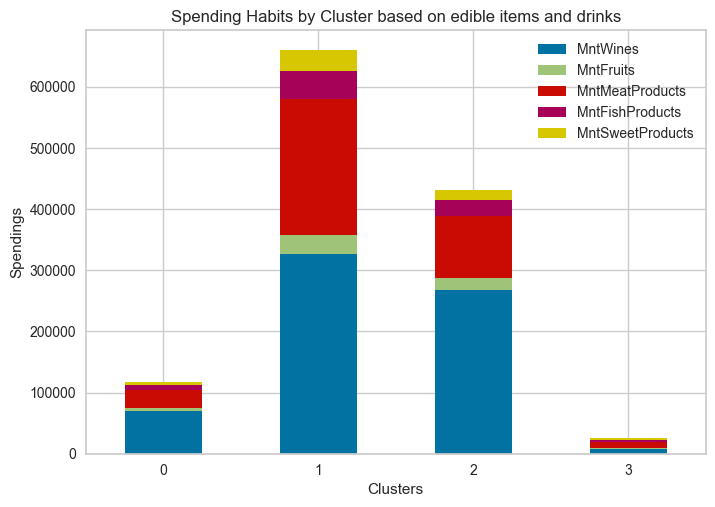

In [47]:
cluster_spendings = df.groupby('Clusters')[['MntWines', 'MntFruits','MntMeatProducts',
                                                  'MntFishProducts', 'MntSweetProducts']].sum()

plt.figure(figsize=(30,15))
cluster_spendings.plot(kind='bar', stacked=True)

plt.title('Spending Habits by Cluster based on edible items and drinks')
plt.xlabel('Clusters')
plt.ylabel('Spendings');
plt.xticks(rotation=0, ha='center')

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

<Figure size 3000x1500 with 0 Axes>

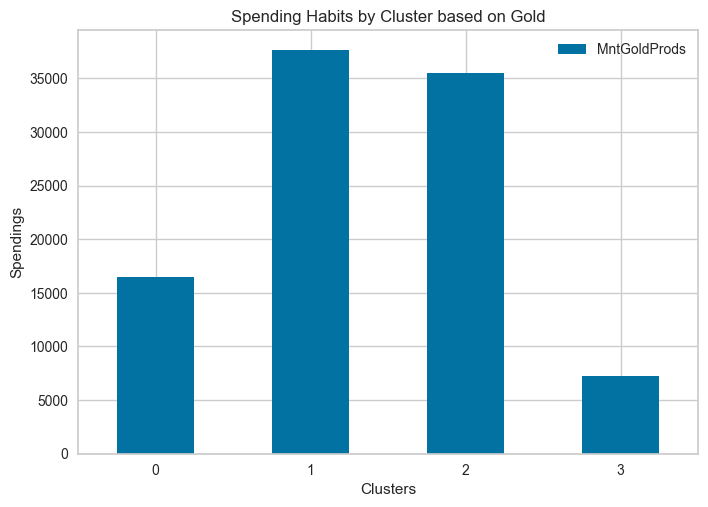

In [48]:
cluster_spendings_wine = df.groupby('Clusters')[['MntGoldProds']].sum()

plt.figure(figsize=(30,15))
cluster_spendings_wine.plot(kind='bar', stacked=True)

plt.title('Spending Habits by Cluster based on Gold')
plt.xlabel('Clusters')
plt.ylabel('Spendings');
plt.xticks(rotation=0, ha='center')

<Figure size 800x550 with 0 Axes>

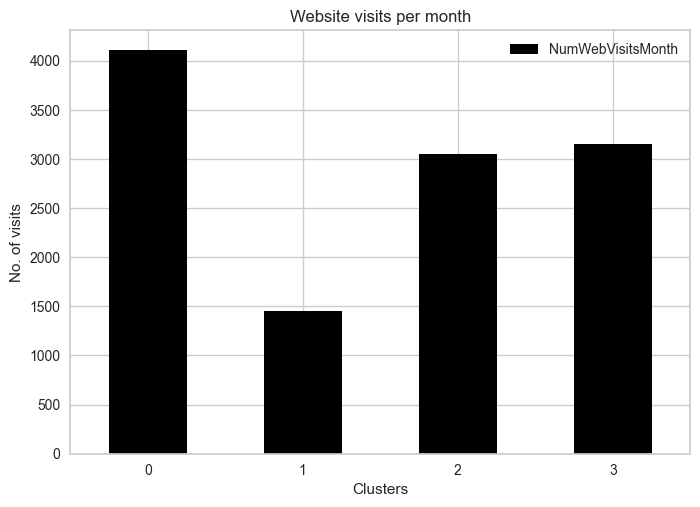

In [49]:
website_visits = df.groupby('Clusters')[['NumWebVisitsMonth']].sum()

plt.figure()
website_visits.plot(kind='bar', color=['black'])

plt.title('Website visits per month')
plt.xlabel('Clusters')
plt.ylabel('No. of visits');
plt.xticks(rotation=0, ha='center');

# Conclusion

* There is a linear relationship between income and spending. People who earn
more tend to spend more.
* On average, customers from all clusters showed the highest acceptance of the last campaign offer, indicating that Campaign 5 was the most successful.
* The 1st cluster of customers had the highest acceptance of offers compared to other clusters.
* Customers from the 3rd cluster showed the least response to the campaigns.
* Customers from each cluster made the highest number of purchases from physical stores, followed by the online store.
* Customers from clusters 0 and 2, which had middle-range incomes, were most attracted to the deals.
* The majority of customer spending was on wines, followed by meat products. Hence, others products like sweets, fish and fruits should be adverties more.



* Customer belonging to cluster 1 have lowest discount purchases, which suggests that either they don't pay much attention to most of the deals because of good income or they need to be targeted more efficiently related to the deals/discounts.

* Customer belonging to cluster 2 have made most of the discount purchases.

* Customer belonging to cluster 1 and 2 are likely to spend more on gold as compared to other customers because of better income.

*   Customers belonging to Cluster 1 who have relatively higher incomes are the ones who have the least monthly frequency to visit the website.
*   Customers who have relatively a higher income are the major buyers of premium products such as wine and gold.
*   People from Cluster 3 need to be targeted more through marketing and deals as they have the least spending and have shown least interest in the promotion campaigns.
*   Better shelf-life and more marketing is required for perishable items like sweets and fruits.
*   Customers from each cluster have a higher tendency to purchase/shop from an offline store so more focus should be put on the offline channel so that customers continue to stick to their existing choice.
*   People from Cluster 1 with the highest earnings have shown the highest interest in promotion campaigns.
*   Customers from Cluster 0 and Cluster 2 who are mostly belonging to the middle class are the ones who are mostly interested in discounted deals and offers.


In [50]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age,TotalSpending,Children,AgeGroup,Clusters
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,58,1617,0,Adult,2
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,61,27,2,Senior Citizen,0
2,4141,1965,Graduation,Relation,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,50,776,0,Adult,1
3,6182,1984,Graduation,Relation,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,31,53,1,Adult,3
4,5324,1981,PhD,Relation,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,34,422,1,Adult,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Relation,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,48,1341,1,Adult,2
2236,4001,1946,PhD,Relation,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,69,444,3,Senior Citizen,2
2237,7270,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,34,1241,0,Adult,2
2238,8235,1956,Master,Relation,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,59,843,1,Adult,2


In [58]:
import pickle

# Select the features for clustering
selected_features = ['Income', 'NumDealsPurchases', 'NumWebVisitsMonth', 'Age', 'TotalSpending', 'Children']
# Save the model information to a file
model_info = {
    'model': model,
    'selected_features': selected_features,
    'cluster_centers': model.cluster_centers_
}

# Replace 'model_info.pkl' with the desired filename
with open('model_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)
